This is a more formalized folder to contain the ideas we have been working on. Let's keep it neat!

In [2]:
#import these before running lower block, some weird thing with environment, we'll figure it out...
import pandas
import mne
print(mne.__version__)
import numpy
import matplotlib.pyplot as plt


0.24.1


In [3]:
#going to write a self contained function for windowing and processing pre-recorded data


#this function will be given a window in the form of an mne array and return a list of the dominant frequencies
def dominant_freq(window):
    #performs a power spectral display function on both the alpha and theta range
    psd_raw_alpha=numpy.array(mne.time_frequency.psd_multitaper(window,fmin=8,fmax=13,picks=["AF7","AF8","TP9","TP10"]))
    psd_raw_theta=numpy.array(mne.time_frequency.psd_multitaper(window,fmin=4,fmax=8,picks=["AF7","AF8","TP9","TP10"]))
####################################################################
    store = numpy.sum(psd_raw_alpha[0], axis=0)
    max_index=numpy.argmax(store)
    dominant_alpha= psd_raw_alpha[1]
    dominant_alpha= dominant_alpha[max_index]
####################################################################
    store = numpy.sum(psd_raw_theta[0], axis=0)
    max_index=numpy.argmax(store)
    dominant_theta= psd_raw_theta[1]
    dominant_theta= dominant_theta[max_index]


    return [dominant_alpha, dominant_theta]


#user will be the patient that we are working with, this will generate a distribution of dominant frequencies
#then we can work with the descriptive statistical measures from this distribution
def baseline(user):

    #defines some parameters to be used by the MNE library, specific to our recording setup
    info = mne.create_info(["timestamps","TP9","AF7","AF8", "TP10", "Right AUX"], 256, ch_types="eeg")

    #imports the raw recording data from the Data folder, 
    raw_recording = pandas.read_csv(str("Data/"+user+"_Baseline.csv"))
    print("Data imported...")
    #takes the raw recording and moves it into an MNE raw array object, allows for easier manipulation later
    #this is a different transformation than later as we are working with a Pandas object
    raw_array = mne.io.RawArray(raw_recording.values.T/1000000, info)
    print("Raw moved to raw_array...")
    #note that we are working with a setup recording at 256 Hz, thus a 256 time step sample represents one second
    step=0 #sets the start point of our window
    max=len(raw_array) #sets the max sample point of our recording
    distribution=[]
    alpha_dist = []
    theta_dist = []
    while step<max:
        #takes a one second sample from the raw recording, this is a numpy array though...
        raw_window=raw_array.get_data(picks=None, start=step,stop=(step+128))
        #again moves this array into ane MNE raw array object            
        mne_window = mne.io.RawArray(raw_window, info)
        #advances the sample window forward by a second
        step=step+256
        #print("dominant alpha and theta freqs:", dominant_freq(mne_window))
        try:
            doms = dominant_freq(mne_window)
            alpha_dist.append(doms[0])
            theta_dist.append(doms[1])
        
        except ValueError:
            print("distributions generated...")

            break

    print(alpha_dist)
    print(theta_dist)

    return (alpha_dist, theta_dist)
        
        
alpha_dist, theta_dist = baseline("Jacob2")

Data imported...
Creating RawArray with float64 data, n_channels=6, n_times=44920
    Range : 0 ... 44919 =      0.000 ...   175.465 secs
Ready.
Raw moved to raw_array...
Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.496 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.496 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.496 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =     

C:\Users\Jacob\AppData\Local\Temp\ipykernel_17236\2429410923.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  psd_raw_alpha=numpy.array(mne.time_frequency.psd_multitaper(window,fmin=8,fmax=13,picks=["AF7","AF8","TP9","TP10"]))
C:\Users\Jacob\AppData\Local\Temp\ipykernel_17236\2429410923.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  psd_raw_theta=numpy.array(mne.time_frequency.psd_multitaper(window,fmin=4,fmax=8,picks=["AF7","AF8","TP9","TP10"]))


Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.496 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.496 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.496 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArray with float64 data, n_channels=6, n_times=128
    Range : 0 ... 127 =      0.000 ...     0.496 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Creating RawArra

Text(0.5, 0, 'Dominant Frequency')

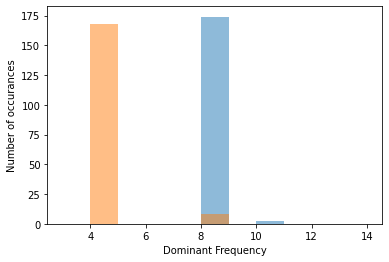

In [4]:
bin_list = numpy.arange(3,15,1) # fill in the function

fig = plt.figure()
plt.hist(alpha_dist,bin_list, alpha=0.5)
plt.hist(theta_dist,bin_list, alpha=0.5)

# use plt.hist() here for apple
# use plt.hist() here for banana
plt.ylabel('Number of occurances')
plt.xlabel('Dominant Frequency')

In [14]:
#this is all the code that Alex used to initialize the Muse stream and take live data

import numpy as np  # Module that simplifies computations on matrices
import matplotlib.pyplot as plt  # Module used for plotting
from pylsl import StreamInlet, resolve_byprop  # Module to receive EEG data
import muselsl_utils as muselsl_utils  # Our own utility functions
import utils
from scipy.signal

In [39]:
# Initialize the bluetooth stream to the Arduino
#this connects to the arduino, breaks 
#serial_port = serial.Serial("COM4", baudrate=9600, timeout=10)
#serial_port.flushInput()
# Handy little enum to make code more readable
class Band:
    Delta = 0
    Theta = 1
    Alpha = 2
    Beta = 3

blink_types = ["Right Wink", "Left Wink", "Normal Blink", "Nothing"]

""" EXPERIMENTAL PARAMETERS """
# Modify these to change aspects of the signal processing

# Length of the EEG data buffer (in seconds)
# This buffer will hold last n seconds of data and be used for calculations
BUFFER_LENGTH = 5

# This is the batch size that out code will grab from the buffer when it is ready to process the new data
EPOCH_LENGTH = 1

# Amount of overlap between two consecutive epochs (in seconds)
OVERLAP_LENGTH = 0.9

# Amount to 'shift' the start of each next consecutive epoch
SHIFT_LENGTH = EPOCH_LENGTH - OVERLAP_LENGTH

# Index of the channel(s) (electrodes) to be used
# 0 = left ear, 1 = left forehead, 2 = right forehead, 3 = right ear
INDEX_CHANNEL = [0, 1, 2, 3]

if __name__ == "__main__":

    """ 1. CONNECT TO EEG STREAM """

    # Search for active LSL streams
    print('Looking for an EEG stream...')
    streams = resolve_byprop('type', 'EEG', timeout=2)
    if len(streams) == 0:
        raise RuntimeError('Can\'t find EEG stream.')

    # Set active EEG stream to inlet and apply time correction
    print("Start acquiring data")
    inlet = StreamInlet(streams[0], max_chunklen=12)
    eeg_time_correction = inlet.time_correction()

    # Get the stream info and description
    info = inlet.info()
    description = info.desc()

    # Get the sampling frequency
    # This is an important value that represents how many EEG data points are
    # collected in a second. This influences our frequency band calculation.
    # for the Muse 2016, this should always be 256
    fs = int(info.nominal_srate())

    """ 2. INITIALIZE BUFFERS """

    # Initialize raw EEG data buffer - 256*5 x 4 array to store the last 5 seconds
    eeg_buffer = np.zeros((int(fs * BUFFER_LENGTH), 4))
    filter_state = None  # for use with the notch filter

    # Compute the number of epochs in "buffer_length"
    n_win_test = int(np.floor((BUFFER_LENGTH - EPOCH_LENGTH) /
                              SHIFT_LENGTH + 1))

    # Initialize the band power buffer (for plotting)
    # bands will be ordered: [delta, theta, alpha, beta]
    band_buffer = np.zeros((n_win_test, 4))

    """ 3. GET DATA """
    info = mne.create_info(["TP9","AF7","AF8", "TP10"], 256, ch_types="eeg")
    # The try/except structure allows to quit the while loop by aborting the
    # script with <Ctrl-C>
    print('Press Ctrl-C in the console to break the while loop.')

    try:
        # The following loop acquires data, computes band powers, and calculates neurofeedback metrics based on those band powers
        while True:

            """ 3.1 ACQUIRE DATA """
            # Obtain EEG data from the LSL stream
            eeg_data, timestamp = inlet.pull_chunk(
                timeout=1, max_samples=int(SHIFT_LENGTH * fs))

            # Only keep the channel we're interested in
            ch_data = np.array(eeg_data)[:, 0:4]

            # Update EEG buffer with the new data
            #this eeg_buffer is a 5 second store of data, sampled at 256 Hz, it is a numpy array
            eeg_buffer, filter_state = muselsl_utils.update_buffer(
                eeg_buffer, ch_data, notch=False,
                filter_state=filter_state)
            

            """ 3.2 COMPUTE BAND POWERS """
            # Get newest samples from the buffer
            data_epoch = muselsl_utils.get_last_data(eeg_buffer,
                                             EPOCH_LENGTH * fs)
            
            data_epoch = np.transpose(data_epoch)

            alpha_store=np.zeros(6)
        
            for i in range(0,4):
                (f,S) = scipy.signal.periodogram(data_epoch[i], fs=256, scaling="density")
                alpha_store = alpha_store + S[8:14]
            
            dom_alpha = f[np.argmax(alpha_store)] + 8
            
            theta_store=np.zeros(6)
        
            for i in range(0,4):
                (f,S) = scipy.signal.periodogram(data_epoch[i], fs=256, scaling="density")
                theta_store = theta_store + S[4:10]
            
            dom_theta = f[np.argmax(alpha_store)] + 4


            #print(len(fourier))
            print(dom_alpha, dom_theta)
        
            #data_epoch=data_epoch.transpose
            #raw_array = mne.io.RawArray(data_epoch, info)

            #commenting this out for now, not sure what it does, but pretty sure we dont need it
            #print('Alpha Relaxation: ', alpha_metric)
            #x = utils.compute_features(data_epoch, filter=None, pca=None, use_original=True)
            #probabilities = classifier.predict_proba([x])
           # if np.any(probabilities > 0.8): 
               # print(f"\r{blink_types[np.argmax(probabilities)]} : {probabilities.max()}")
               # serial_port.write(bytes(str(np.argmax(probabilities)), encoding='utf-8'))

            # Beta Protocol:
            # Beta waves have been used as a measure of mental activity and concentration
            # This beta over theta ratio is commonly used as neurofeedback for ADHD
            # beta_metric = smooth_band_powers[Band.Beta] / \
            #     smooth_band_powers[Band.Theta]
            # print('Beta Concentration: ', beta_metric)

            # Alpha/Theta Protocol:
            # This is another popular neurofeedback metric for stress reduction
            # Higher theta over alpha is supposedly associated with reduced anxiety
            # theta_metric = smooth_band_powers[Band.Theta] / \
            #     smooth_band_powers[Band.Alpha]
            # print('Theta Relaxation: ', theta_metric)

    except KeyboardInterrupt:
        #serial_port.close()
        print('Closing!')

Looking for an EEG stream...
Start acquiring data
Press Ctrl-C in the console to break the while loop.
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
9.0 5.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
9.0 5.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
11.0 7.0
11.0 7.0
11.0 7.0
10.0 6.0
13.0 9.0
12.0 8.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
12.0 8.0
12.0 8.0
12.0 8.0
8.0 4.0
12.0 8.0
12.0 8.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
12.0 8.0
11.0 7.0
10.0 6.0
10.0 6.0
10.0 6.0
11.0 7.0
10.0 6.0
11.0 7.0
8.0 4.0
8.0 4.0
13.0 9.0
13.0 9.0
12.0 8.0
12.0 8.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
8.0 4.0
8.0 4.0
13.0 9.0
9.0 5.0
13.0 9.0
13.0 9.0
9.0 5.0
9.0 5.0
9.0 5.0
11.0 7.0
9.0 5.0
11.0 7.0
9.0 5.0
9.0 5.0
8.0 4.0
9.0 5.0
8.0 4.0
8.0 4.0
8.0 4.0
8.0 4.0
9.0 5.0
8.0 4.0
8.0 4.0
10.0 6.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
13.0 9.0
9.0 5.